In [2]:
from __future__ import division, print_function
__author__ = 'fbb CUSP 2016'
import os
import numpy as np
from numpy.random import randn
import pylab as pl

from pandas import Series, DataFrame
import pandas
import pandas as pd

PUIdata = os.getenv("PUIDATA")
print (PUIdata)

/Users/fbianco/science/Dropbox/UI/PUIdata


Notebook that parces and formatts Table 6.1 of D. Lane's Introduction to Statistics
using Pandas functionalities

Refer to https://github.com/fedhere/UInotebooks/blob/master/dataWrangling/PandasDataWrangling-Chap7.ipynb
and Python for Data Analysis Chaoter 7
for more pandas data munging functions and methods!


In [84]:
# setting up some preferences
%pylab inline

np.set_printoptions(precision=4, threshold=500)
np.random.seed(123321)
pl.rc('figure', figsize=(10, 6))
pl.rc('font', size=15)
pd.options.display.max_rows = 100

Populating the interactive namespace from numpy and matplotlib


In [11]:
# use the environmental variable PUIDATA to access data 
# stored in your own PUIDATA directory
PUIdata = os.getenv('PUIDATA')

urlpath = "https://serv.cusp.nyu.edu/~fbianco/PUI2017/data/"
os.system("wget " + urlpath + "IntrotoStats_Table6_1.csv")
os.system("mv IntrotoStats_Table6_1.csv " + PUIdata);

In [60]:
df_student = pd.read_csv(PUIdata + "/IntrotoStats_Table6_1.csv")
df_student

,#Students Name,Hair Color,Gender,Major,Height,Computer Experience
0,Norma,Brown,Female,Psychology,"5'4""",Lots
1,Amber,Blonde,Female,Social Science,"5'7""",Very Little
2,Paul,Blonde,Male,History,"6'1""",Moderate
3,Christopher,Black,Male,Biology,"5'10""",Lots
4,Sonya,Brown,Female,Psychology,"5'4""",Little


In [61]:
# replacing entries with numbers (encoding categorical variables as numerical)
# this can be done trivially with replace one value by one

In [62]:
df_student.Gender = df_student.Gender.replace('Female', 0)

In [63]:
df_student.Gender = df_student.Gender.replace('Male', 1)

In [64]:
df_student

,#Students Name,Hair Color,Gender,Major,Height,Computer Experience
0,Norma,Brown,0,Psychology,"5'4""",Lots
1,Amber,Blonde,0,Social Science,"5'7""",Very Little
2,Paul,Blonde,1,History,"6'1""",Moderate
3,Christopher,Black,1,Biology,"5'10""",Lots
4,Sonya,Brown,0,Psychology,"5'4""",Little


In [65]:
#creating a dictionary with the encoded values for the "Computer Experience" key
experience_to_number = {
    'None' : 0,
    'Very Little' : 1,
    'Little' : 2,
    'Moderate' : 3,    
    'Good' : 4,
    'Lots' : 5
}

In [66]:
# replacing Computer Experience string with a numerical with map and a dictionary
# placing the new values in a new variable (new column)
df_student['Experience'] = \
    df_student['Computer Experience'].map(experience_to_number)  

In [67]:
df_student

,#Students Name,Hair Color,Gender,Major,Height,Computer Experience,Experience
0,Norma,Brown,0,Psychology,"5'4""",Lots,5
1,Amber,Blonde,0,Social Science,"5'7""",Very Little,1
2,Paul,Blonde,1,History,"6'1""",Moderate,3
3,Christopher,Black,1,Biology,"5'10""",Lots,5
4,Sonya,Brown,0,Psychology,"5'4""",Little,2


In [68]:
# it can be done in bulk with a dictionary inline too with map, a dictionary, in place
df_student['Hair Color'] =\
    df_student['Hair Color'].replace({'Brown':1,'Blonde':0,'Black':2})

In [69]:
df_student

,#Students Name,Hair Color,Gender,Major,Height,Computer Experience,Experience
0,Norma,1,0,Psychology,"5'4""",Lots,5
1,Amber,0,0,Social Science,"5'7""",Very Little,1
2,Paul,0,1,History,"6'1""",Moderate,3
3,Christopher,2,1,Biology,"5'10""",Lots,5
4,Sonya,1,0,Psychology,"5'4""",Little,2


In [70]:
#drop variables you do not need
df_student.drop(['Computer Experience', 'Major', '#Students Name'], 
                axis=1, inplace=True)

In [71]:
df_student

,Hair Color,Gender,Height,Experience
0,1,0,"5'4""",5
1,0,0,"5'7""",1
2,0,1,"6'1""",3
3,2,1,"5'10""",5
4,1,0,"5'4""",2


In [72]:
# lastly, format height. 
# create a function to parse heignt in feet, inch into meters
# use map to apply it

In [73]:
def formatHeight(heightstring):
    hs = heightstring.replace('"','').split("'")
    return float(hs[0]) * 12 + float(hs[1])


In [74]:
df_student.Height = df_student.Height.map(formatHeight)

In [75]:
df_student

,Hair Color,Gender,Height,Experience
0,1,0,64,5
1,0,0,67,1
2,0,1,73,3
3,2,1,70,5
4,1,0,64,2


In [76]:
import numpy as np
import statsmodels.api as sm
# NOTE: by PEP8 you should put all imports at the top. 
# I leave them here to show you the flow of the project as I write it
logit_mod = sm.MNLogit(df_student.Experience, np.array([df_student.Height, 
                                               df_student['Hair Color'], 
                                               df_student.Gender]).T)
logit_res = logit_mod.fit()
print('Parameters: ', logit_res.params)

         Current function value: 0.277259
         Iterations: 35
Parameters:              0           1          2
x1  -0.424188   -0.487632  -0.333525
x2  49.449195   19.159443  43.646782
x3 -10.524509  106.092840  74.159656


/Users/fbianco/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/statsmodels-0.6.1-py2.7-macosx-10.6-x86_64.egg/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [77]:
logit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:             Experience   No. Observations:                    5
Model:                        MNLogit   Df Residuals:                       -4
Method:                           MLE   Df Model:                            6
Date:                Thu, 21 Sep 2017   Pseudo R-squ.:                  0.7919
Time:                        07:34:51   Log-Likelihood:                -1.3863
converged:                      False   LL-Null:                       -6.6609
                                        LLR p-value:                    0.1033
================================================================================
Experience=2       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
x1              -0.4242   2.22e+04  -1.92e-05      1.000     -4.34e+04  4.34e+04
x2              49.4492   1.42e+06   3.48e-05      1.000     -2.78e+06  2.78e+06
x3             -10.5245   1.77e+17  -5.96e-17      1.000     -3.46e+17  3.46e+17
--------------------------------------------------------------------------------
Experience=3       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
x1              -0.4876   1.71e+05  -2.85e-06      1.000     -3.35e+05  3.35e+05
x2              19.1594   6.15e+05   3.12e-05      1.000     -1.21e+06  1.21e+06
x3             106.0928        nan        nan        nan           nan       nan
--------------------------------------------------------------------------------
Experience=5       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
x1              -0.3335   1062.527     -0.000      1.000     -2082.849  2082.182
x2              43.6468   9.73e+04      0.000      1.000     -1.91e+05  1.91e+05
x3              74.1597        nan        nan        nan           nan       nan
================================================================================
"""

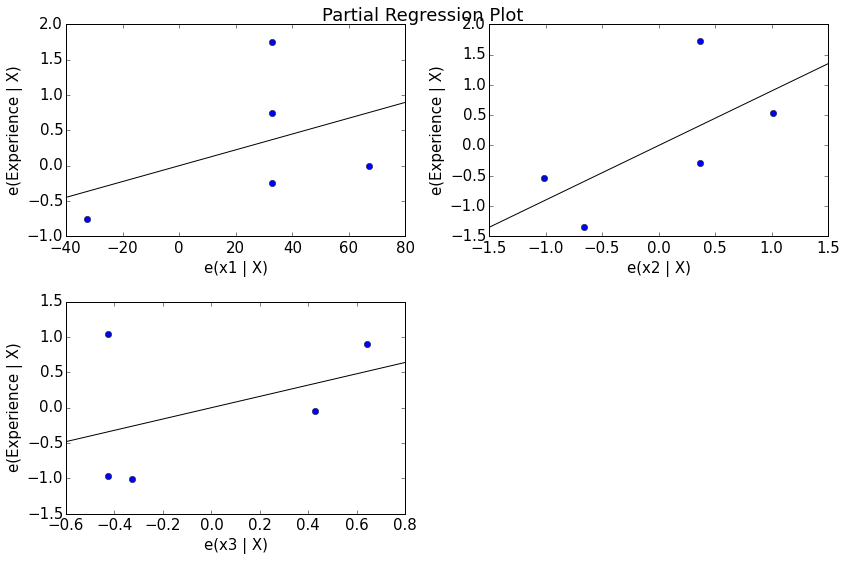

In [85]:
fig = pl.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(logit_res, fig=fig)
